In [1]:
import warnings
warnings.filterwarnings("ignore")
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [2]:
data=pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### DataSet Description

##### InvoiceNo: 
Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

##### StockCode:
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

##### Description:
Product (item) name. Nominal.

##### Quantity:
The quantities of each product (item) per transaction. Numeric.

##### InvoiceDate: 
Invice Date and time. Numeric, the day and time when each transaction was generated.

##### UnitPrice:
Unit price. Numeric, Product price per unit in sterling.

##### CustomerID:
Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

##### Country: 
Country name. Nominal, the name of the country where each customer resides.

In [3]:
print("Data Records : \n Rows : ",data.shape[0],"\n Columns :",data.shape[1])
print(" Duplicate Records : ",data.duplicated().sum())
data.drop_duplicates(inplace=True)

Data Records : 
 Rows :  541909 
 Columns : 8
 Duplicate Records :  5268


  ####  Null Values Summary

In [4]:
null_df = pd.DataFrame(data.dtypes).T.rename(index={0:"Column Type"})
null_df = pd.concat([null_df,pd.DataFrame(data.isna().sum()).T.rename(index={0:'null values'}),pd.DataFrame(data.isna().sum()/data.shape[0]*100).T.rename(index={0:'null values in %'})])
data.dropna(inplace=True)
null_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,datetime64[ns],float64,float64,object
null values,0,0,1454,0,0,0,135037,0
null values in %,0.0,0.0,0.270945,0.0,0.0,0.0,25.163377,0.0


In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [6]:
df_countries = data[["Country","CustomerID","InvoiceNo"]].groupby(["Country","CustomerID","InvoiceNo"]).count().reset_index(drop=False)
print("No of countries in Data Frame : ",len(df_countries["Country"].value_counts()))

No of countries in Data Frame :  37


In [7]:
def Barplot(x,y,title="Title",xLabel="",yLabel="",rotate=0,figsize=(8,4),barLabel=True,palette="rainbow",orienation="v"):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=rotate)
    plt.title(title,pad=10)
    plot = sns.barplot(x=x,y=y,palette=palette,orient=orienation)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    if barLabel:
        for i in plot.containers:
            plt.bar_label(i)
    plt.show()

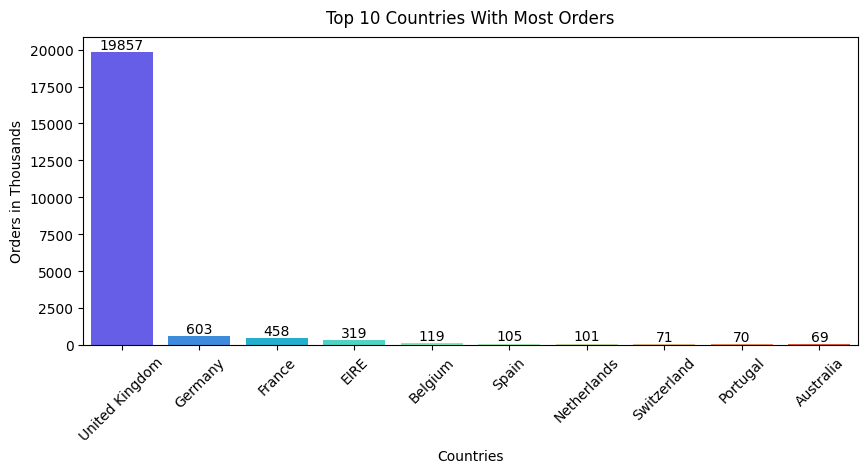

In [8]:
Barplot(x=df_countries["Country"].value_counts().index[:10],
        y=df_countries["Country"].value_counts().values[:10],
        title="Top 10 Countries With Most Orders",
        xLabel="Countries",
        yLabel="Orders in Thousands",
        figsize=(10,4),
        rotate=45)

In [9]:
for col in data.columns:
    print(data[col].value_counts())
    print('-'*40,"\n")

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: count, Length: 22190, dtype: int64
---------------------------------------- 

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: count, Length: 3684, dtype: int64
---------------------------------------- 

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          

,products,transactions,customers
quantity,3684,22190,4372


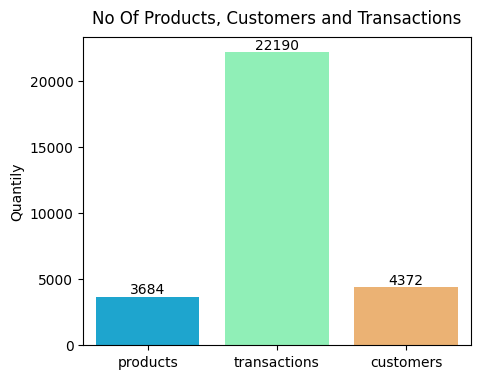

In [10]:
details_df = pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['InvoiceNo'].value_counts()),
               'customers': len(data['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

display(details_df)
print("\n")

Barplot(x=details_df.columns,
        y=details_df.values[0],
        title="No Of Products, Customers and Transactions",yLabel="Quantily",figsize=(5,4))


In [11]:
orders_per_basket  = data.groupby(["CustomerID","InvoiceNo"],as_index=False)["InvoiceDate"].count().rename(columns={"InvoiceDate":"No of Products"})
orders_per_basket[:10]

,CustomerID,InvoiceNo,No of Products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [12]:
orders_per_basket["Orders Cancelled"] = orders_per_basket["InvoiceNo"].apply(lambda x : int("C"==str(x)[0]))
orders_per_basket[:10]

,CustomerID,InvoiceNo,No of Products,Orders Cancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
5,12347.0,556201,18,0
6,12347.0,562032,22,0
7,12347.0,573511,47,0
8,12347.0,581180,11,0
9,12348.0,539318,17,0


In [13]:
total_orders_cancelled = orders_per_basket["Orders Cancelled"].sum()

In [14]:
print("No Of Orders Cancelled :",f"{total_orders_cancelled}/{len(orders_per_basket)} ({round(total_orders_cancelled/len(orders_per_basket)*100,2)}%)")

No Of Orders Cancelled : 3654/22190 (16.47%)


In [15]:
data.sort_values("CustomerID")[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland


In [16]:
df_check = data[data['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
count = 0
for index, col in  df_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(' HYPOTHESIS NOT FULFILLED')
        if count==5:
            break
        count+=1

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                            17548.0
Quantity                                  -12
StockCode                               22556
Description    PLASTERS IN TIN CIRCUS PARADE 
UnitPrice                                1.65
Name: 235, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                              17548.0
Quantity                                    -24
StockCode                                 21984
Description    PACK OF 12 PINK PAISLEY TISSUES 
UnitPrice                                  0.29
Name: 236, dtype: obje

In [17]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  data.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = data[(data['CustomerID'] == col['CustomerID']) &
                         (data['StockCode']  == col['StockCode']) & 
                         (data['InvoiceDate'] < col['InvoiceDate']) & 
                         (data['Quantity']   > 0)].copy()
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 

In [18]:
print("Counterpart Transactions : ",len(entry_to_remove))
print("Without Counterpart Transactions : ",len(doubtfull_entry))

Counterpart Transactions :  7521
Without Counterpart Transactions :  1226


In [19]:
df_cleaned.drop(entry_to_remove,inplace = True)
df_cleaned.drop(doubtfull_entry,inplace=True)

In [20]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("no of entries to delete:" ,remaining_entries.shape[0])
remaining_entries[:5]

no of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048.0,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0


In [21]:
df_cleaned["CustomerID"]=df_cleaned["CustomerID"].astype(int)

In [22]:
df_cleaned[(df_cleaned['CustomerID'] == 15358) & (df_cleaned['StockCode'] == '84535B')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
19719,537888,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2010-12-09 10:04:00,0.65,15358,United Kingdom,0
44629,540187,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-01-05 13:53:00,0.65,15358,United Kingdom,0
72849,542268,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-01-27 08:30:00,0.65,15358,United Kingdom,0
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0


In [23]:
df_cleaned[(df_cleaned['CustomerID'] == 14659.0) & (df_cleaned['StockCode'] == '22784')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


In [24]:
df_cleaned[(df_cleaned['CustomerID'] == 14048) & (df_cleaned['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


In [25]:
df_cleaned[(df_cleaned['CustomerID'] == 16422) & (df_cleaned['StockCode'] == '47566B')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
83172,543287,47566B,TEA TIME PARTY BUNTING,25,2011-02-07 10:03:00,4.95,16422,United Kingdom,0
110685,545693,47566B,TEA TIME PARTY BUNTING,10,2011-03-06 14:09:00,4.95,16422,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
121140,546738,47566B,TEA TIME PARTY BUNTING,5,2011-03-16 11:57:00,4.95,16422,United Kingdom,0
137883,548171,47566B,TEA TIME PARTY BUNTING,20,2011-03-29 13:58:00,4.95,16422,United Kingdom,0
144780,548807,47566B,TEA TIME PARTY BUNTING,15,2011-04-04 12:54:00,4.95,16422,United Kingdom,0
188507,553039,47566B,TEA TIME PARTY BUNTING,25,2011-05-13 08:21:00,3.75,16422,United Kingdom,0
194368,553574,47566B,TEA TIME PARTY BUNTING,40,2011-05-18 09:59:00,4.95,16422,United Kingdom,0
201143,554271,47566B,TEA TIME PARTY BUNTING,15,2011-05-23 13:06:00,4.95,16422,United Kingdom,0
215995,555798,47566B,TEA TIME PARTY BUNTING,25,2011-06-07 11:32:00,3.75,16422,United Kingdom,0


In [26]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].astype(str).str.contains('^[a-zA-z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [27]:
for code in list_special_codes:
    print(code , "\t"*3+"-->", df_cleaned[df_cleaned['StockCode'] == code]["Description"].unique()[0])

POST 			--> POSTAGE
D 			--> Discount
C2 			--> CARRIAGE
M 			--> Manual
BANK CHARGES 			--> Bank Charges
PADS 			--> PADS TO MATCH ALL CUSHIONS
DOT 			--> DOTCOM POSTAGE


#### Description
POST: POSTAGE - This represents charges related to postage for shipping items.

D: Discount - This represents discounts applied to transactions.

C2: CARRIAGE - Likely related to carriage or shipping costs.

M: Manual - Transactions that are manually recorded or handled.

BANK CHARGES: Bank Charges - Charges related to banking transactions or fees.

PADS: PADS TO MATCH ALL CUSHIONS - Possibly related to cushion pads or similar products.

DOT: DOTCOM POSTAGE - Postage charges specific to online transactions.

In [28]:
df_cleaned["TotalPrice"] = df_cleaned["UnitPrice"]*(df_cleaned["Quantity"]-df_cleaned["QuantityCanceled"])

In [29]:
df_cleaned.sort_values("CustomerID")[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


In [30]:
basket_price = df_cleaned.groupby(["CustomerID","InvoiceNo"],as_index=False)["TotalPrice"].sum().rename(columns={"TotalPrice":"Basket Price"})
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# selection des entrées significatives:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000000000
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:43:00.000000000
4,12347,556201,382.52,2011-06-09 13:01:00.000000000
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000000000


In [33]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,QuantityCanceled,TotalPrice
count,392857.000000,392857,392857.000000,392857.000000,392857.000000,392857.000000
mean,13.143587,2011-07-10 19:22:58.940683520,3.139151,15287.588204,0.624314,21.341374
min,-720.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,-4161.060000
25%,2.000000,2011-04-07 11:16:00,1.250000,13955.000000,0.000000,4.680000
50%,6.000000,2011-07-31 12:05:00,1.950000,15150.000000,0.000000,11.800000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,0.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,80995.000000,8142.750000
std,181.564772,NaN,22.466373,1713.458613,175.527084,71.019589


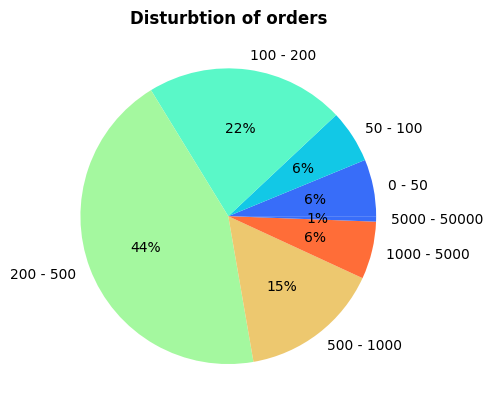

In [67]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i,price in enumerate(price_range):
    if i==0: continue
    val = basket_price[(basket_price["Basket Price"]<price) &(basket_price["Basket Price"]>price_range[i-1])]["Basket Price"].count()
    count_price.append(val)
labels = [f"{price_range[i-1]} - {price_range[i]}" for i in range(1,len(price_range))]
sns.set_palette("rainbow")
plt.title("Disturbtion of orders",fontsize=12, fontweight='bold')
plt.rcParams['font.weight'] = 'normal' 
plt.pie(count_price,labels=labels,autopct='%.0f%%',shadow=False,startangle=0)
plt.show()